In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data=pd.read_csv("C:\\Users\\MEGHANA\\Downloads\\phiusiil+phishing+url+dataset\\PhiUSIIL_Phishing_URL_Dataset.csv")

In [4]:
data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [5]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve


In [6]:
# Overview of the data
print(data.info())
print(data.head())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [7]:
# Check for missing values
print(data.isnull().sum())





FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

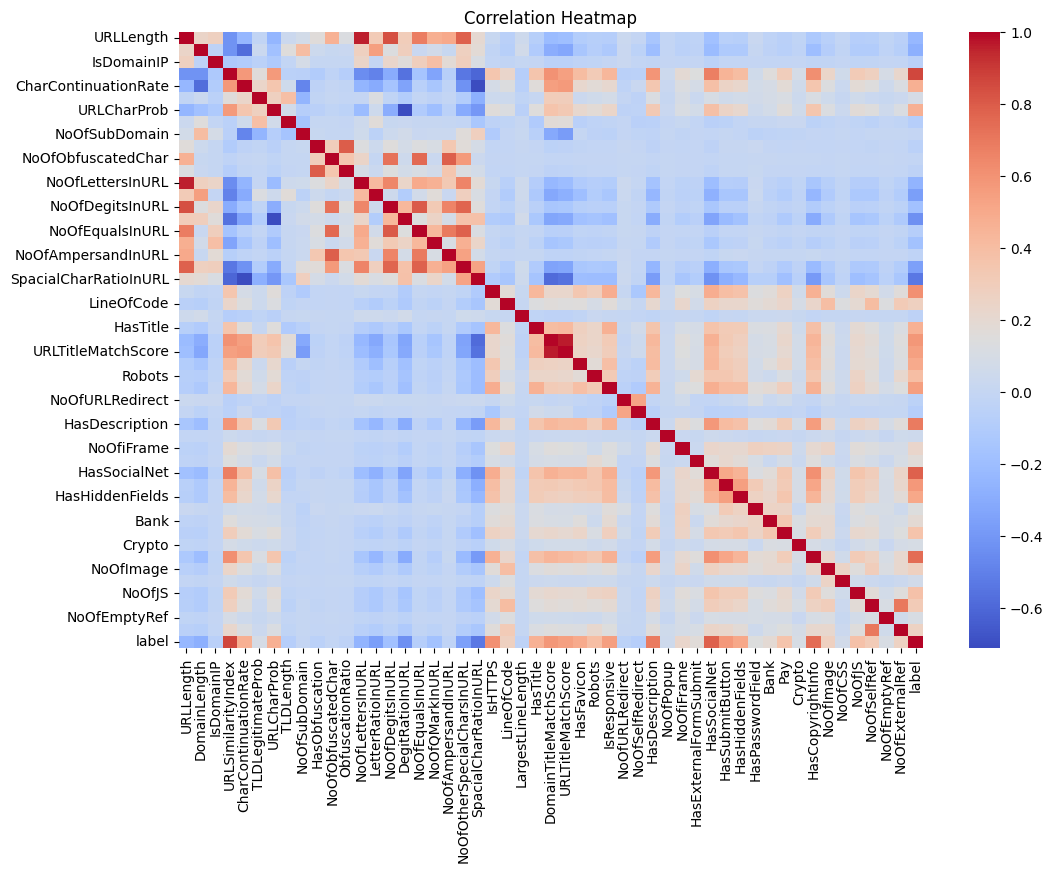

In [8]:
# Filter numeric columns
numeric_cols = data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [9]:
# Drop irrelevant columns (e.g., FILENAME, URL)
data.drop(['FILENAME', 'URL'], axis=1, inplace=True)



In [10]:
# Convert categorical columns to numeric (e.g., TLD)
data = pd.get_dummies(data, columns=['TLD'], drop_first=True)



In [11]:
# Scale numerical features if needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['URLLength', 'DomainLength', 'URLSimilarityIndex', 
                  'CharContinuationRate', 'TLDLegitimateProb', 
                  'NoOfImage', 'NoOfCSS', 'NoOfJS', 
                  'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [13]:
# Define features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Encode the training and testing datasets
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

categorical_columns = X_train.select_dtypes(include=['object']).columns

# Apply encoding
X_train_encoded[categorical_columns] = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded[categorical_columns] = encoder.transform(X_test[categorical_columns])

# Train the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)

# Evaluate the model
predictions = rf_model.predict(X_test_encoded)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



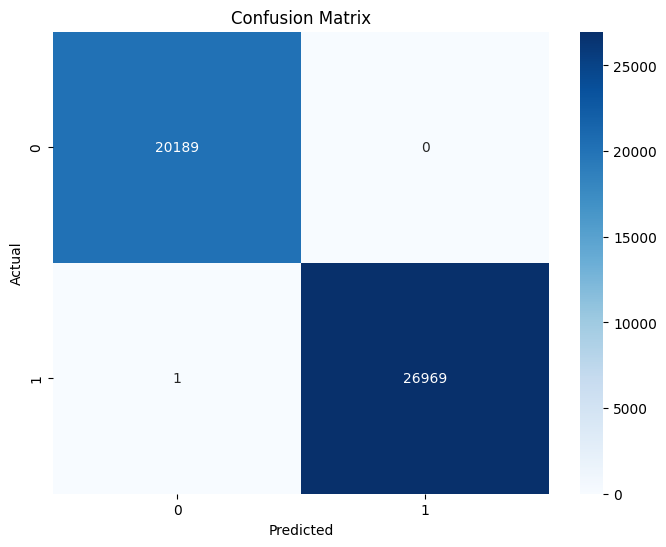

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20189
           1       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = rf_model.predict(X_test_encoded)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [24]:
import pandas as pd
from scipy.stats import chi2_contingency

# Iterate over each column in the DataFrame
for col in data.columns:
    contingency_table = pd.crosstab(data[col], data['label'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test for {col}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print()

Chi-square test for URLLength:
Chi-square statistic: 67407.06168244261
P-value: 0.0

Chi-square test for Domain:
Chi-square statistic: 235682.3372966447
P-value: 3.972362509510112e-117

Chi-square test for DomainLength:
Chi-square statistic: 36976.8031780716
P-value: 0.0

Chi-square test for IsDomainIP:
Chi-square statistic: 852.260590396482
P-value: 2.3448225852057846e-187

Chi-square test for URLSimilarityIndex:
Chi-square statistic: 232603.227390821
P-value: 0.0

Chi-square test for CharContinuationRate:
Chi-square statistic: 65322.87516163058
P-value: 0.0

Chi-square test for TLDLegitimateProb:
Chi-square statistic: 71998.95018702387
P-value: 0.0

Chi-square test for URLCharProb:
Chi-square statistic: 234441.34570621056
P-value: 3.286006817906975e-25

Chi-square test for TLDLength:
Chi-square statistic: 6820.319022704782
P-value: 0.0

Chi-square test for NoOfSubDomain:
Chi-square statistic: 26713.479728471255
P-value: 0.0

Chi-square test for HasObfuscation:
Chi-square statistic: 6

In [25]:
from catboost import CatBoostClassifier

# Specify categorical columns
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_columns]

# Train CatBoost
catboost_model = CatBoostClassifier(iterations=1000, depth=6, cat_features=categorical_indices, verbose=200)
catboost_model.fit(X_train, y_train)

# Predict
y_pred = catboost_model.predict(X_test)


Learning rate set to 0.091172
0:	learn: 0.3672692	total: 975ms	remaining: 16m 13s
200:	learn: 0.0001002	total: 1m 31s	remaining: 6m 3s
400:	learn: 0.0001002	total: 2m 22s	remaining: 3m 32s
600:	learn: 0.0001002	total: 3m 16s	remaining: 2m 10s
800:	learn: 0.0001002	total: 4m 12s	remaining: 1m 2s
999:	learn: 0.0001002	total: 5m 7s	remaining: 0us
